In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import sys
import matplotlib.pyplot as plt
%matplotlib inline

sys.path.append("..")

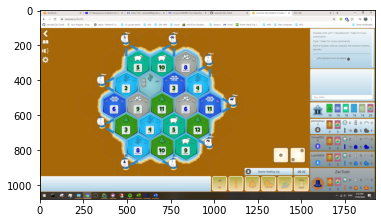

In [3]:
import colonist_ql.interface_interaction.feature_extration as fe
import colonist_ql.interface_interaction.game_image_extraction as ie
import colonist_ql.game_structure.visualise as visualise

image = ie.game_image()
plt.imshow(image)

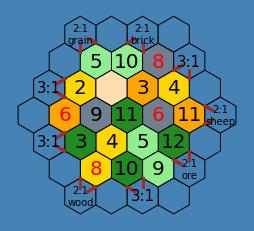

In [5]:
fe.PORT_IMAGE_DIR = "../game_images/icons"
hexes = fe.initial_board_extraction(image)


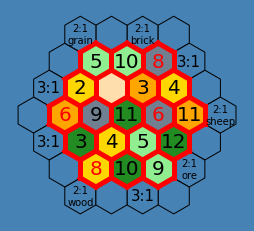

In [23]:
visualise.draw_board(hexes)

